# **Covid-19 pandemic - Kano State Nigeria**

**IMPORT IMPORTANT LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, Conv1D, MaxPooling1D, Flatten, Dropout
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Activation, Add
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, Conv1D, MaxPooling1D, Flatten, Dropout
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Activation, Add
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Lambda
from tensorflow.keras import backend as K

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore')

**LOAD THE DATA SET FROM URL**

In [6]:
url = "https://raw.githubusercontent.com/mkumakech/Covid-19_Pandemic/refs/heads/master/kano%20(1).csv "

In [7]:
df = pd.read_csv(url)

In [8]:
print (df.head())

  State  Confirmed  Discharged  Death        Date
0  Kano         92           0      0  01/05/2020
1  Kano          2           7      3  02/05/2020
2  Kano         29           0      0  03/05/2020
3  Kano         23           0      2  04/05/2020
4  Kano         32           3      3  05/05/2020


In [9]:
print (df.tail())

    State  Confirmed  Discharged  Death        Date
360  Kano          0           6      0  26/04/2021
361  Kano          0           0      0  27/04/2021
362  Kano          0           0      0  28/04/2021
363  Kano          6           0      0  29/04/2021
364  Kano          1           0      0  30/04/2021


In [12]:
print (df.shape)

(365, 5)


**PERFORM OPERATIONS TO CLEAN THE DATA**

In [15]:
# Convert date to the format python can read
if 'Date' in df.columns:

    df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
    df.set_index('Date', inplace=True)



In [14]:
print (df.head())

           State  Confirmed  Discharged  Death
Date                                          
2020-05-01  Kano         92           0      0
2020-05-02  Kano          2           7      3
2020-05-03  Kano         29           0      0
2020-05-04  Kano         23           0      2
2020-05-05  Kano         32           3      3


In [17]:
print(df.tail())

           State  Confirmed  Discharged  Death
Date                                          
2021-04-26  Kano          0           6      0
2021-04-27  Kano          0           0      0
2021-04-28  Kano          0           0      0
2021-04-29  Kano          6           0      0
2021-04-30  Kano          1           0      0


In [18]:
# Use only relevant columns. Replace with actual column names from your data
# Inspect the df.columns to find the correct column names
print(df.columns) # Print columns to identify correct names

Index(['State', 'Confirmed', 'Discharged', 'Death'], dtype='object')


In [19]:
target_columns = ['Confirmed', 'Discharged', 'Death']


In [ ]:
# Fill missing values if any
df = df.fillna(method='ffill')



In [20]:
# Select only numerical features for scaling
numerical_features = df.select_dtypes(include=['number']).columns
df_to_scale = df[numerical_features]

# Normalize data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_to_scale)

# Convert to DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=numerical_features, index=df.index) # keep the original index



**PREPARATION OF THE DATA SET FOR TIMES-SERIES**

In [22]:
def create_dataset(data, time_step=10):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:i+time_step])
        y.append(data[i+time_step])
    return np.array(X), np.array(y)

time_step = 10
X, y = create_dataset(scaled_df.values, time_step)

# Split into train and test
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

**DEFINE THE MODELS TO BE USED**

***Model 1: Long Short-Term Memory (LSTM)***

In [23]:
def build_lstm(input_shape):
    model = Sequential()
    model.add(LSTM(64, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(32))
    model.add(Dense(3))
    model.compile(optimizer='adam', loss='mse')
    return model

***Model 2: Gated Recurrent Unit (GRU)***

---



In [24]:
def build_gru(input_shape):
    model = Sequential()
    model.add(GRU(64, return_sequences=True, input_shape=input_shape))
    model.add(GRU(32))
    model.add(Dense(3))
    model.compile(optimizer='adam', loss='mse')
    return model

***Model 3: Convolutional Neural Networks (CNN)***

In [25]:
def build_cnn(input_shape):
    model = Sequential()
    model.add(Conv1D(64, kernel_size=2, activation='relu', input_shape=input_shape))
    model.add(Conv1D(32, kernel_size=2, activation='relu'))
    model.add(Flatten())
    model.add(Dense(3))
    model.compile(optimizer='adam', loss='mse')
    return model

***Model 4: Temporal Convolutional Networks (TCN)***

In [26]:
def TCN_block(x, filters, kernel_size, dilation_rate):
    conv1 = Conv1D(filters, kernel_size, padding='causal', dilation_rate=dilation_rate)(x)
    act1 = Activation('relu')(conv1)
    conv2 = Conv1D(filters, kernel_size, padding='causal', dilation_rate=dilation_rate)(act1)
    act2 = Activation('relu')(conv2)

    shortcut = Conv1D(filters, 1, padding='same')(x)
    out = Add()([shortcut, act2])
    return out

def build_tcn(input_shape):
    inputs = Input(shape=input_shape)
    x = TCN_block(inputs, 64, 3, 1)
    x = TCN_block(x, 64, 3, 2)
    x = Flatten()(x)
    x = Dense(3)(x)
    model = Model(inputs, x)
    model.compile(optimizer='adam', loss='mse')
    return model

**TRAINING AND EVALUATING THE MODELS**


🔧 Training model: LSTM
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 192ms/step


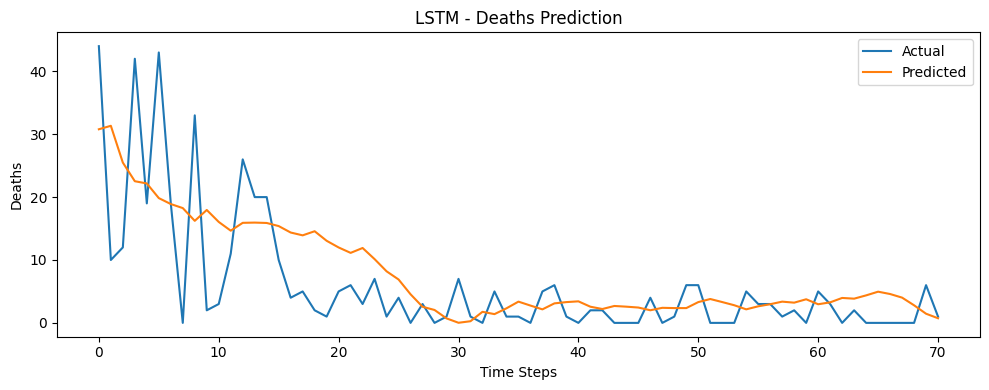

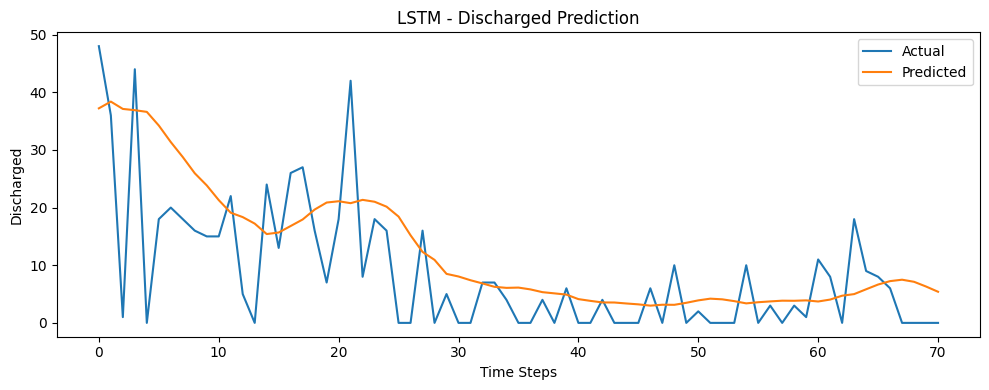

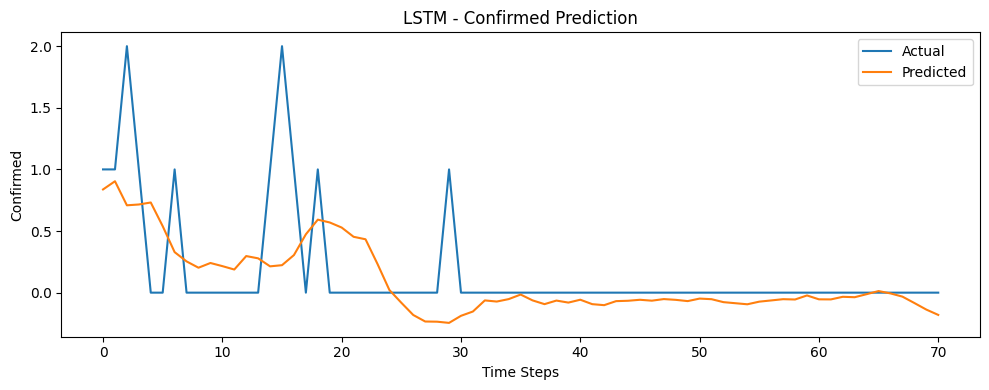


🔧 Training model: GRU
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 207ms/step


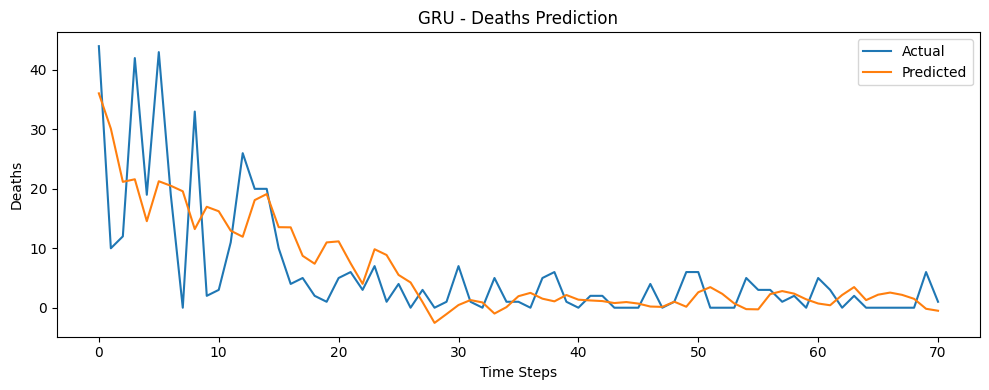

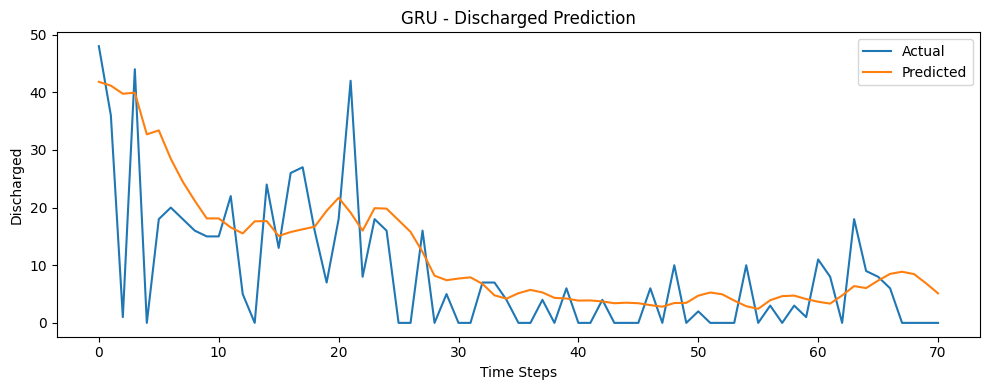

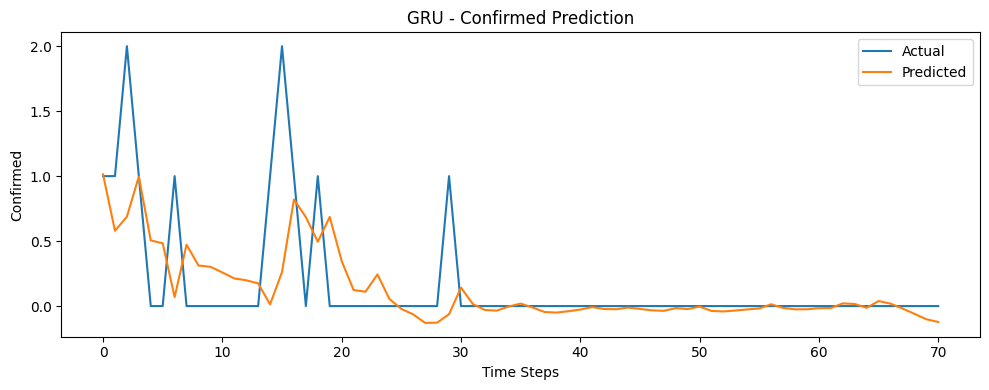


🔧 Training model: CNN
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


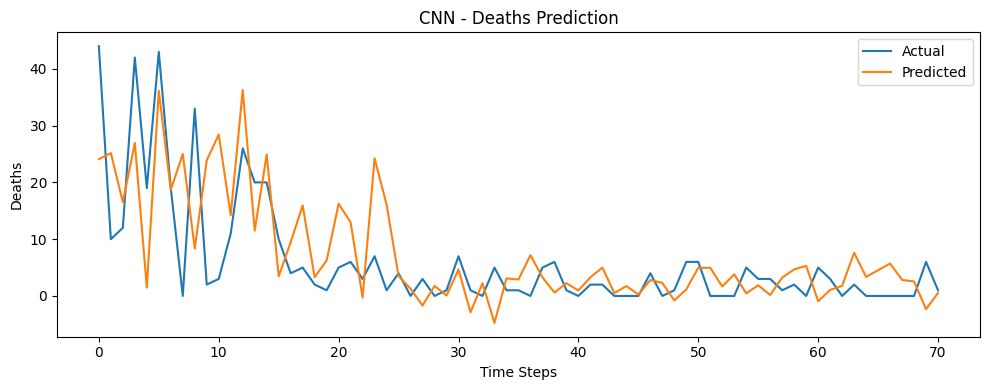

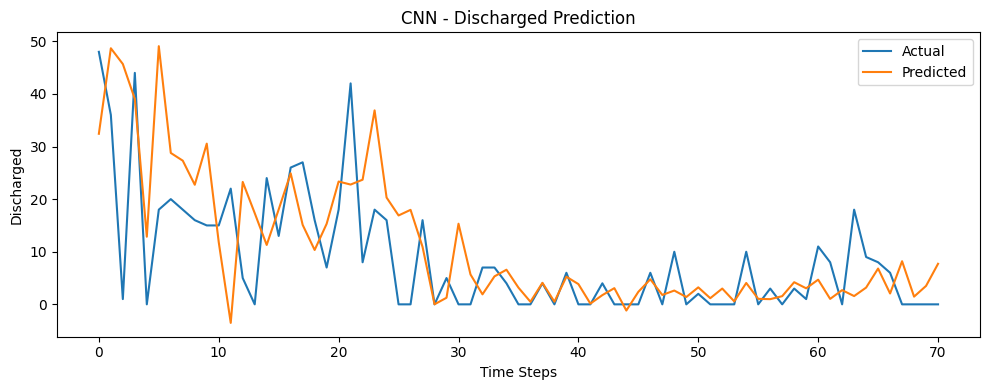

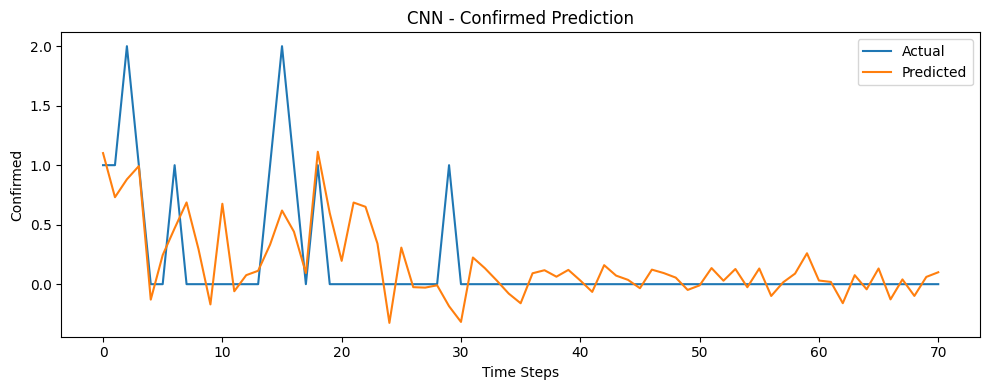


🔧 Training model: TCN
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


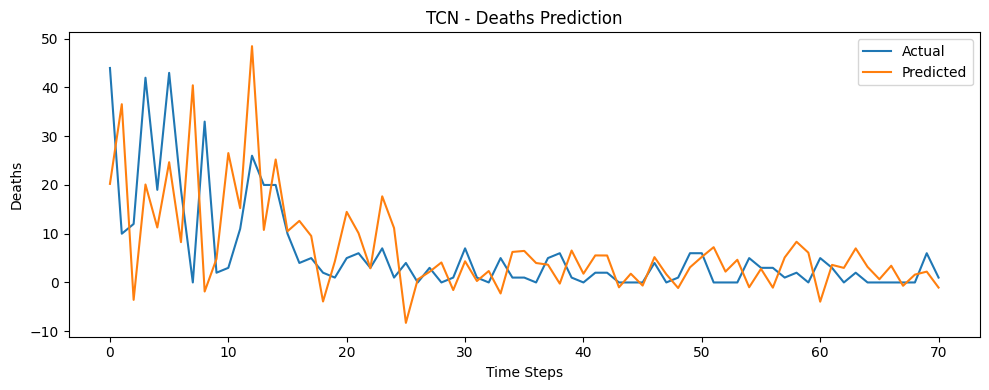

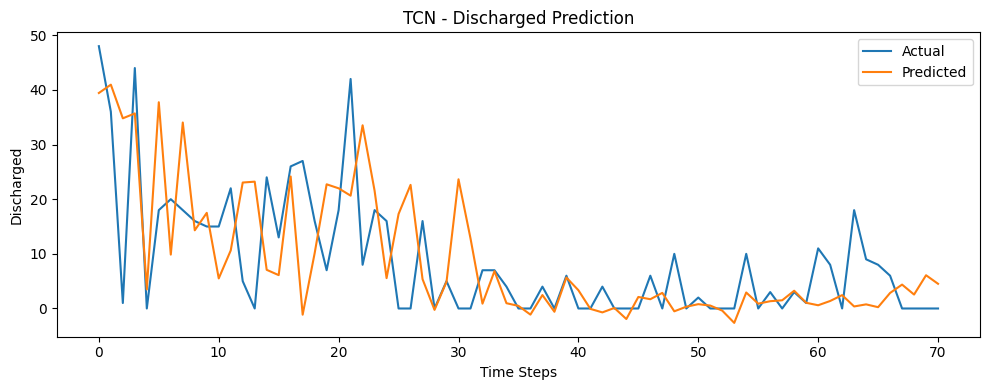

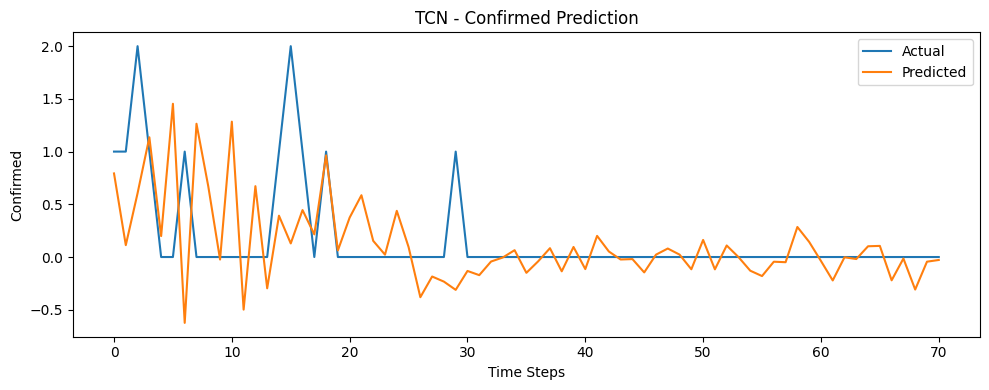

In [28]:
# Dictionary of model-building functions
model_builders = {
    'LSTM': build_lstm,
    'GRU': build_gru,
    'CNN': build_cnn,
    'TCN': build_tcn
}

results = {}

for model_name, build_fn in model_builders.items():
    print(f"\n🔧 Training model: {model_name}")

    # Build and compile model
    model = build_fn((X_train.shape[1], X_train.shape[2]))

    # Train model
    history = model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=0)

    # Predict
    y_pred = model.predict(X_test)

    # Inverse transform predictions and actuals
    y_pred_inv = scaler.inverse_transform(y_pred)
    y_test_inv = scaler.inverse_transform(y_test)

    # Calculate metrics
    mse = mean_squared_error(y_test_inv, y_pred_inv)
    mae = mean_absolute_error(y_test_inv, y_pred_inv)
    r2 = r2_score(y_test_inv, y_pred_inv)

    results[model_name] = {
        'MSE': mse,
        'MAE': mae,
        'R2': r2
    }

    # --------- Visualization ---------
    labels = ['Deaths', 'Discharged', 'Confirmed']
    for i in range(3):
        plt.figure(figsize=(10, 4))
        plt.plot(y_test_inv[:, i], label='Actual')
        plt.plot(y_pred_inv[:, i], label='Predicted')
        plt.title(f'{model_name} - {labels[i]} Prediction')
        plt.xlabel('Time Steps')
        plt.ylabel(labels[i])
        plt.legend()
        plt.tight_layout()
        plt.show()

In [29]:
print("\n📊 Model Evaluation Summary:")
for model_name, metrics in results.items():
    print(f"\nModel: {model_name}")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")


📊 Model Evaluation Summary:

Model: LSTM
MSE: 51.0771
MAE: 4.1934
R2: 0.2935

Model: GRU
MSE: 45.8542
MAE: 3.7895
R2: 0.3536

Model: CNN
MSE: 64.7726
MAE: 4.5188
R2: 0.2239

Model: TCN
MSE: 76.5782
MAE: 4.8610
R2: -0.1448


In [32]:
pip install tabulate

In [33]:
# Import the tabulate library
from tabulate import tabulate

# Create a dictionary of your results
results_data = {
    'Model': ['LSTM', 'GRU', 'CNN', 'TCN'],
    'MSE': [51.007, 45.8542, 64.7726, 76.5782],
    'MAE': [4.1934, 3.7895, 4.5188, 4.8610],
    'R2 Score': [0.2935, 0.3536, 0.2239, -0.1448]
}

# Convert to DataFrame
results_df = pd.DataFrame(results_data)

# Display the table with lines
print("\nModel Performance Comparison Table:")
print(tabulate(results_df, headers='keys', tablefmt='grid', showindex=False))


Model Performance Comparison Table:
+---------+---------+--------+------------+
| Model   |     MSE |    MAE |   R2 Score |
+=========+=========+========+============+
| LSTM    | 51.007  | 4.1934 |     0.2935 |
+---------+---------+--------+------------+
| GRU     | 45.8542 | 3.7895 |     0.3536 |
+---------+---------+--------+------------+
| CNN     | 64.7726 | 4.5188 |     0.2239 |
+---------+---------+--------+------------+
| TCN     | 76.5782 | 4.861  |    -0.1448 |
+---------+---------+--------+------------+


In [37]:
# Highlight the best values
def highlight_best(s, reverse=False):
    is_best = s == (s.min() if not reverse else s.max())
    return ['background-color: skyblue' if v else '' for v in is_best]

# Display with highlighting
results_df.style.apply(highlight_best, subset=['MSE']) \
                .apply(highlight_best, subset=['MAE']) \
                .apply(highlight_best, subset=['R2 Score'], reverse=True)

,Model,MSE,MAE,R2 Score
0,LSTM,51.007000,4.193400,0.293500
1,GRU,45.854200,3.789500,0.353600
2,CNN,64.772600,4.518800,0.223900
3,TCN,76.578200,4.861000,-0.144800


**CONCLUSION**


*  MSE (Mean Squared Error): Lower is better and GRU has the lowest, so it's the most accurate overall.
*   MAE (Mean Absolute Error): GRU also has the lowest, meaning its average error is smallest.

*  R² Score: Measures how well the predictions fit the actual data. The closer to 1, the better. GRU has the highest R², so it explains the data best.


Therefore,the GRU model outperformed the others in this lab.
It had the lowest Mean Squared Error (MSE = 45.85), the lowest Mean Absolute Error (MAE = 3.79), and the highest R² score (R² = 0.35). This means it made the most accurate predictions for deaths, discharged, and confirmed Covid-19 cases compared to the LSTM, CNN, and TCN models.

---











